In [ ]:
import pandas as pd           ## Import Pandas library for processing dataframe as pd
import numpy as np            ## Import Numy for processing matrix as np
import sys                    ##Import sys library for maximizing the csv limit for large csv file which can be Geneious file.
import csv                    ##Import csv module to input the csv file to dataframe 

csv.field_size_limit(sys.maxsize)                                                                                                         ##Maximize the csv file input size
Geneious_raw_DF=pd.read_csv("Annotations.csv", engine='python', error_bad_lines=False)                                                    ##Import raw Geneious output table for variant analysis genes. Set up engine equals python and error_bad_lines for preventing errors with processing large csv files
Geneious_DF_filtered_poly=Geneious_raw_DF[(Geneious_raw_DF['Type']=='Polymorphism') & (Geneious_raw_DF['Amino Acid Change'].notnull())]   ##If the type column contains polymorphism and Amino Acid Change column is not empty then create a dataframe satisfying those conditions
Geneious_DF_filtered_cov=Geneious_raw_DF[Geneious_raw_DF['Type']=='Coverage - High']                                                      ##If the Coverage - High is in the type column as value then select dataframe for those column values
Geneious_DF_filtered_poly["TrackerSNP"]=(Geneious_DF_filtered_poly["Amino Acid Change"].astype(str).str[0]+                               ##Create a TrackerSNP Column which has both amino acid before the change
Geneious_DF_filtered_poly["CDS Codon Number"].astype(int).astype(str)+                                                                    ##Create a TrackerSNP Column which has CDC Codon number for amino acid change location
Geneious_DF_filtered_poly["Amino Acid Change"].astype(str).str[-1])                                                                       ##Create a TrackerSNP Column which has both amino acid after the change
Pre_Combined_Variant_Wildtype = [Geneious_DF_filtered_poly, Geneious_DF_filtered_cov]                                                     ##Produce a complete dataframe which contains both variants and wildtypes
Combined_Vi_Wi = pd.concat(Pre_Combined_Variant_Wildtype)                                                                                 ##Concatenate the dataframes for variants and wildtypes
Combination_filtered_dup=Combined_Vi_Wi.drop_duplicates(subset =["Document Name", "TrackerSNP"] )                                         ##Drop duplicates meaning if the values are already in variants then drop it from the wildtypes
                                                                                                                                          ##The dataframe contains information, "Sample,POOLED,Year,SITE,TreatmentDay,GENE,G_ANNOTATION,COVERAGE,VAF,VF,SNP,TYPE\n")

def site(row):                                ##Set up a function for assignging site based on the values in the document name column. This will change with each study please update the sites. 
    if row['Document Name'][4:6]=="Ab":       ##Assign Abia for the abbreviation
        return 'Abia'
    elif row['Document Name'][4:6]=="Ad":     ##Assign Adamawa for the abbreviation
        return 'Adamawa'
    elif row['Document Name'][4:6]=="Ai":     ##Assign Akwa Ibom for the abbreviation
        return 'Akwa Ibom'
    elif row['Document Name'][4:6]=="An":     ##Assign Anambra for the abbreviation
        return 'Anambra'
    elif row['Document Name'][4:6]=="Ba":     ##Assign Bauchi for the abbreviation
        return 'Bauchi'
    elif row['Document Name'][4:6]=="By":     ##Assign Bayelsa for the abbreviation
        return 'Bayelsa'
    elif row['Document Name'][4:6]=="Be":     ##Assign Benue for the abbreviation
        return 'Benue'
    elif row['Document Name'][4:6]=="Bo":     ##Assign Borno for the abbreviation
        return 'Borno'
    elif row['Document Name'][4:6]=="Cr":     ##Assign Cross River for the abbreviation
        return 'Cross River'
    elif row['Document Name'][4:6]=="De":     ##Assign Delta for the abbreviation
        return 'Delta'
    elif row['Document Name'][4:6]=="Eb":     ##Assign Ebonyi for the abbreviation
        return 'Ebonyi'
    elif row['Document Name'][4:6]=="Ed":     ##Assign Edo for the abbreviation
        return 'Edo'
    elif row['Document Name'][4:6]=="Ek":     ##Assign Ekiti for the abbreviation
        return 'Ekiti'
    elif row['Document Name'][4:6]=="En":     ##Assign Enugu for the abbreviation
        return 'Enugu'
    elif row['Document Name'][4:6]=="Fc":     ##Assign Fct Abuja for the abbreviation
        return 'Fct Abuja'
    elif row['Document Name'][4:6]=="Go":     ##Assign Gombe for the abbreviation
        return 'Gombe'
    elif row['Document Name'][4:6]=="Im":     ##Assign Imo for the abbreviation
        return 'Imo'
    elif row['Document Name'][4:6]=="Ji":     ##Assign Jigawa for the abbreviation
        return 'Jigawa'
    elif row['Document Name'][4:6]=="Kd":     ##Assign Kaduna for the abbreviation
        return 'Kaduna'
    elif row['Document Name'][4:6]=="Kn":     ##Assign Kano for the abbreviation
        return 'Kano'
    elif row['Document Name'][4:6]=="Kt":     ##Assign Katsina for the abbreviation
        return 'Katsina'
    elif row['Document Name'][4:6]=="Ke":     ##Assign Kebbi for the abbreviation
        return 'Kebbi'
    elif row['Document Name'][4:6]=="Ko":     ##Assign Kogi for the abbreviation
        return 'Kogi'
    elif row['Document Name'][4:6]=="Kw":     ##Assign Kwara for the abbreviation
        return 'Kwara'
    elif row['Document Name'][4:6]=="La":     ##Assign Lagos for the abbreviation
        return 'Lagos'
    elif row['Document Name'][4:6]=="Na":     ##Assign Nasarawa for the abbreviation
        return 'Nasarawa'
    elif row['Document Name'][4:6]=="Ni":     ##Assign Niger for the abbreviation
        return 'Niger'
    elif row['Document Name'][4:6]=="Og":     ##Assign Ogun for the abbreviation
        return 'Ogun'
    elif row['Document Name'][4:6]=="On":     ##Assign Ondo for the abbreviation
        return 'Ondo'
    elif row['Document Name'][4:6]=="Os":     ##Assign Osun for the abbreviation
        return 'Osun'
    elif row['Document Name'][4:6]=="Oy":     ##Assign Oyo for the abbreviation
        return 'Oyo'
    elif row['Document Name'][4:6]=="Pl":     ##Assign Plateau for the abbreviation
        return 'Plateau'
    elif row['Document Name'][4:6]=="Ri":     ##Assign Rivers for the abbreviation
        return 'Rivers'
    elif row['Document Name'][4:6]=="So":     ##Assign Sokoto for the abbreviation
        return 'Sokoto'
    elif row['Document Name'][4:6]=="Ta":     ##Assign Taraba for the abbreviation
        return 'Taraba'
    elif row['Document Name'][4:6]=="Yo":     ##Assign Yobe for the abbreviation
        return 'Yobe'
    elif row['Document Name'][4:6]=="Za":     ##Assign Zamfara for the abbreviation
        return 'Zamfara'
    
def POOLEDsize(row):                                          ##Set up a function for assigning TreatmentDay based on the values in the document name column
    if row['Document Name'].replace(" ","")[13:14]=="0":      ##If 0 in the position 13 of the string
        return row['Document Name'].replace(" ","")[14:15]    ##then assign only position 14 as POOLED size
    elif row['Document Name'].replace(" ","")[13:14]!="0":    ##If 0 not in the position 13 of the string
        return row['Document Name'].replace(" ","")[13:15]    ##then assign the string from 13 and 14

def TreatmentDay(row): ##Set up a function for assigning TreatmentDay based on the values in the document name column
    if row['Document Name'][6:8]=="00":
        return '0'
    elif row['Document Name'][6:8]=="1A": ##To do: confirm this with Stefano whether it was a naming issue. There was also 1P which caused one more problem
        return '1'
    elif row['Document Name'][6:8]!="00" and row['Document Name'][6:8]!="1A":
        return row['Document Name'][6:8]   

def POOLED(row):                                              ##Set up a function for POOLED based on the values in the document name column
    if row['Document Name'].replace(" ","")[12:13]=="p":      ##If position 12 has p in it
        return 'POOLED'                                       ##then it is considered POOLED sample
    elif row['Document Name'].replace(" ","")[12:13]!="p":    ##If position 12 has no p in it
        return 'individual'                                   ##then it is considered individual sample

def year(row):  ##Set up a function for Year  based on the values in the document name column
    return row['Document Name'][0:2]

def type_SNP(row):  ##Set up a TYPE column based on given value in the Type whether it is mutation or wildtype
    if row['Type'] =='Polymorphism':  ##Type is either mutation or wildtype
        return "mutation"
    if row['Type'] =='Coverage - High':
        return "wildtype"
    
def SNP(row):  ##Set up a SNP column to give pre or post amino acid changes based on mutation or wildtype
    if row['Type'] =='Polymorphism':  ##Set up SNP notation for wildtype or mutation
        return row['TrackerSNP'][1::]
    if row['Type'] =='Coverage - High':
        return row['TrackerSNP'][0:-1]
    
# Dhruvi: added this below to split the document name and now in step2, no error occurs due to reruning the code.
def name(row):
    return row['Document Name'].split("_")[0].replace(" ","") ##Split the document name with _ and assign first substring to clean up the name of the sample
  
#Dhruvi : ##Apply the functions defined previously for assigning site,TreatmentDay,POOLED,year,type,SNP,name
Combination_filtered_dup[["SITE",'TREATMENT_DAY', "POOLED","YEAR","TYPE","SNP","Document Name" ,"POOLEDSIZE"]] = Combination_filtered_dup.apply([site,TreatmentDay,POOLED,year,type_SNP,SNP,name,POOLEDsize], axis=1)

Combination_report1=Combination_filtered_dup[Combination_filtered_dup['Type']=='Polymorphism'] ##Select columns with mutations
Combination_report2=Combination_filtered_dup[Combination_filtered_dup['Type']=='Coverage - High'] ##Select columns with wildtypes
final_report1=Combination_report1[["Document Name","Sequence Name","SITE",'TREATMENT_DAY',"POOLED","YEAR","Coverage","Variant Frequency","Variant Raw Frequency","TrackerSNP","TYPE","SNP","POOLEDSIZE"]] ##Assign sample information to samples with mutation
final_report2=Combination_report2[["Document Name","Sequence Name","SITE",'TREATMENT_DAY',"POOLED","YEAR","Average Coverage","Variant Frequency","Variant Raw Frequency","TrackerSNP","TYPE","SNP","POOLEDSIZE"]] ##Assign sample information to samples with wildtypes
final_report2_re=final_report2.rename(columns={'Average Coverage': 'Coverage'}) ##Change the name of average coverage to coverage for samples with wildtypes
final_combine=[final_report1, final_report2_re] ##Combine the information from wildtypes and mutations into one dataframe
final_combine_2=pd.concat(final_combine) ##concatenate
#print(final_combine_2)
#print(final_combine_4)
###This part is for polishing lab version of individual
final_combine_4=final_combine_2[final_combine_2["POOLED"]=="individual"] ##In order to create table just for individual for Matt's report 
#print(final_combine_4)
##create another dataframe where POOLED column is just individual
#Dhruvi : replace the rename part with one line code using dictonary
final_combine_4=final_combine_4.rename(columns={'Document Name': 'AMD_ID_IND','Sequence Name': 'GENE','TrackerSNP': 'G_ANNOTATION', 'Coverage': 'COVERAGE','Variant Frequency': 'VAF','Variant Raw Frequency': 'VF' })

final_combine_4=final_combine_4.replace({'DHPS_437Corrected ': 'DHPS'})  ##Rename DHPS_437Corrected values to DHPS to correct the name

#Dhruvi : we can remove this part as sample name is already splited at begining using name function.


cols = list(final_combine_4.columns) ##Change columns into list
a, b = cols.index('SNP'), cols.index('TYPE') ##Index the column to swtich the order to match the previous Guinea report
cols[b], cols[a] = cols[a], cols[b] ##Change order of the column
final_combine_4 = final_combine_4[cols] ##After reordering the columns reassign to the dataframe
# Dhruvi: fill the empty value on multiple columns using dict
values = {"VAF": "0%", "VF": "0"}
final_combine_4 = final_combine_4.fillna(value=values)

final_combine_4=final_combine_4.replace({'Pf': 1})
final_combine_4=final_combine_4.replace({'xx': 1})
final_combine_4=final_combine_4.drop('POOLEDSIZE', 1)
final_combine_4=final_combine_4.replace({'DHPS ': 'DHPS'})

#final_combine_4=final_combine_4[final_combine_4['SITE'].notnull()] ##Check if the site is empty or not and assign site 
final_combine_4.to_csv("NG21_individual_EPI.csv", sep=',', index=False) ##Create a file with the dataframe for testing purpose this is internal lab version

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

final_combine_4_voi=final_combine_4[final_combine_4.G_ANNOTATION.isin(voi_list)]
#print(final_combine_4_voi)
final_combine_4_voi.to_csv("NG21_individual_EPI_VOI.csv", sep=',', index=False)

In [2]:
#POOLED_part1=pd.read_csv("POOLED_Info.csv") ##import a file with information about POOLED samples

#final_combine_2.rename(columns={'Document Name':'AMD ID (POOLED)'}, inplace=True) ##Reanme the document name to AMD_ID


df_merged_poolsize = final_combine_2#[final_combine_2["POOLED"]=="POOLED"] ##merge the information based on AMD_ID to add POOLED columns and POOLED size columns

#df_merged_poolsize = df_merged_poolsize.drop(['SITE ','Year_y'], axis=1) ##Get rid of duplicate columns which is SITE and year_y

#df_merged_poolsize.PoolSize.fillna(value=1, inplace=True) ##Fill empty values for poolsize for individual with 1s

df_merged_poolsize['Variant Frequency'] = df_merged_poolsize['Variant Frequency'].fillna("0%") ##Fill the empty Variant Frequency value with 0
df_merged_poolsize['Variant Raw Frequency'] = df_merged_poolsize['Variant Raw Frequency'].fillna(0) ##Fill empty values with 0s
#print(df_merged_poolsize)
#df_merged_poolsize["Prod"]=df_merged_poolsize["Variant Frequency"].str.split('%').str[0].str.strip("%").astype(float)*df_merged_poolsize["POOLEDsize"].astype(float) ##Get a product by multiplying variant frequency times the pool size
df_merged_poolsize.rename(columns={'Variant Frequency':'VAF', 'Variant Raw Frequency':'VF'}, inplace=True) ##Reanme the document name to AMD_ID
df_merged_poolsize['Coverage'] = df_merged_poolsize['Coverage'].apply(str) ##Change values from numeric to string
df_merged_poolsize['VAF'] = df_merged_poolsize['VAF'].apply(str) ##Change values from numeric to string
df_merged_poolsize['VF'] = df_merged_poolsize['VF'].apply(str)  ##Change values from numeric to string
df_merged_poolsize.Coverage= df_merged_poolsize.Coverage.str.split(" ").str[0]  ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.VAF= df_merged_poolsize.VAF.str.split(" ").str[0] ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.VF= df_merged_poolsize.VF.str.split(" ").str[0] ##Split the string by space for values with -> then pick the substring before the first space
df_merged_poolsize.rename(columns={'VAF': 'Variant Frequency', 'VF':'Variant Raw Frequency'}, inplace=True) ##Reanme the document name to AMD_ID
df_merged_poolsize=df_merged_poolsize.rename(columns={'Document Name': 'AMD_ID_POOLED','Sequence Name': 'GENE','TrackerSNP': 'G_ANNOTATION', 'Coverage': 'COVERAGE','Variant Frequency': 'VAF','Variant Raw Frequency': 'VF'  })


df_merged_poolsize=df_merged_poolsize.replace({'DHPS_437Corrected ': 'DHPS'})  ##Rename DHPS_437Corrected values to DHPS to correct the name
df_merged_poolsize=df_merged_poolsize.replace({'DHPS ': 'DHPS'}) 
df_merged_poolsize=df_merged_poolsize.replace({'Pf': 1})

df_merged_poolsize2=df_merged_poolsize[df_merged_poolsize["POOLED"]=="POOLED"]
#df_merged_poolsize2 = df_merged_poolsize2.drop('Prod',  1)

df_merged_poolsize2.to_csv("NG21_POOLED_EPI.csv", index=False)

df_merged_poolsize_ind_pool=df_merged_poolsize
#df_merged_poolsize2 = df_merged_poolsize2.drop('Prod',  1)

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

df_merged_poolsize2_voi=df_merged_poolsize2[df_merged_poolsize2.G_ANNOTATION.isin(voi_list)]

df_merged_poolsize2_voi=df_merged_poolsize2_voi.replace({'Pf': 1})

df_merged_poolsize2_voi.to_csv("NG21_POOLED_EPI_VOI.csv", index=False)

df_merged_poolsize_ind_pool.to_csv("NG21_POOLED_EPI_QC.csv", index=False)

df_merged_poolsize_ind_pool_voi=df_merged_poolsize_ind_pool[df_merged_poolsize_ind_pool.G_ANNOTATION.isin(voi_list)]

df_merged_poolsize_ind_pool_voi.to_csv("NG21_POOLED_EPI_QC_voi.csv", index=False)

df_merged_poolsize=df_merged_poolsize.replace({'xx': 1})

df_merged_poolsize=df_merged_poolsize.replace({'Pf': 1})

df_merged_poolsize["POOLEDSIZE"] = pd.to_numeric(df_merged_poolsize["POOLEDSIZE"])

df_merged_poolsize["Prod"]=df_merged_poolsize["VAF"].str.split('%').str[0].str.strip("%").astype(float)*df_merged_poolsize["POOLEDSIZE"].astype(float) ##Get a product by multiplying variant frequency times the pool size




In [3]:
#print(df_merged_poolsize)
df_merged_count=df_merged_poolsize.groupby(['SITE','GENE','G_ANNOTATION', 'POOLED']).sum()  ##Sum the columns based on overlapping values on site, trackersnp, and POOLED
#print(df_merged_count)
df_merged_countv=df_merged_poolsize.groupby(['SITE','GENE','G_ANNOTATION', 'POOLED', 'SNP']).sum() ##Sum the columns based on agreeing values on site, trackersnp, and POOLED, and snp
df_merged_count=df_merged_count.groupby(['SITE','GENE','G_ANNOTATION']).sum() ##Sum again based on stie and tracker snp
df_merged_countv=df_merged_countv.groupby(['SITE','GENE','G_ANNOTATION','SNP']).sum() ##Sum again based on site, tracker, and snp
#df_merged_countv = df_merged_countv.drop('Pools ', 1) ##drop POOLED information
df_merged_countv=df_merged_countv.reset_index()  ##Reset index so  that we can  use the columns
df_merged_countv['Type'] = np.where(df_merged_countv['SNP'].str[0].str.isdigit(), "Mutation" , "WildType") ##If the first character of SNP value is digit assign mutation  else assign wildtype
#print(df_merged_countv)

df_merged_countv.rename(columns={'POOLEDSIZE':'Number_of_samples'}, inplace=True) ##Reanme the Poolsize to number  of samples

df_merged_countv['Tracker']=df_merged_countv['G_ANNOTATION'].str[:-1]
df_merged_countvp=df_merged_countv  ##Create another dataframe from previous dataframe this is for calculating products for VAF
df_merged_countv=df_merged_countv.pivot(index=["SITE", 'GENE',"G_ANNOTATION"], columns="Type", values="Number_of_samples") ##pivot and align mutation and wildtype
df_merged_countvp=df_merged_countvp.pivot(index=["SITE", 'GENE',"G_ANNOTATION"], columns="Type", values="Prod") ##pivot and align mutation and wildtype
"""
To do: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
This is where I am stuck. Trying using pivot to fix it
"""

df_merged_countvp=df_merged_countvp.reset_index() ##Reset indexes
df_merged_countv=df_merged_countv.reset_index()  ##Reset indexes

df_merged_countv['SNP'] = np.where(pd.isna(df_merged_countv['Mutation']), df_merged_countv['G_ANNOTATION'].astype(str).str[0:-1], df_merged_countv['G_ANNOTATION'].astype(str).str[1::]) ##Depending on codntion where mutation value is nan or not assign SNP with just first character or last character and amino acid position
cols = list(df_merged_countv.columns) ##Change column to list format
cols = cols[0:3] + cols[5:6] + cols[3:5] ##Adjust the column order by adding column as lists
df_merged_countv = df_merged_countv[cols] ##Return the column back to dataframe
df_merged_countv.rename(columns={'TrackerSNP':'G_ANNOTATION'}, inplace=True) ##Change column name from trackersnp to G_ANNOTATION

#print(df_merged_countv)

df_merged_countv['Prod']= df_merged_countvp['Mutation'] ##Copy the mutation information which is sum of all the variant frequencies for each variant

df_merged_countv['Prod'] = df_merged_countv['Prod'].fillna(0) ##Fill empty values with 0s

df_merged_countv['Mutation'] = df_merged_countv['Mutation'].fillna(0) ##Fill empty values with 0s

df_merged_countv['WildType'] = df_merged_countv['WildType'].fillna(0) ##Fill empty values with 0s

df_merged_countv["Total"] = df_merged_countv['Mutation'] + df_merged_countv['WildType']                        # count total by adding mutation to Wildtype
df_merged_countv["VAF"] = (df_merged_countv['Prod']/df_merged_countv["Total"]).round(2).astype(str) + '%'      # count vaf by dividing prod by total

cols = list(df_merged_countv.columns)  ##turn columns in to list
a, b = cols.index('VAF'), cols.index('Total') ##Switch reindex VAF and total columns
cols[b], cols[a] = cols[a], cols[b]
df_merged_countv = df_merged_countv[cols] ##Assign switched column orders

df_merged_countv = df_merged_countv.drop('Prod', 1) ##drop POOLED information

df_merged_countv=df_merged_countv.replace({'DHPS_437Corrected ': "DHPS"})

df_voi=pd.read_csv("voinew3.csv")
df_voi["VOI"]=df_voi["RefAA"]+df_voi["AAPos"].astype(str)+df_voi["AltAA"]
voi_list=df_voi["VOI"].tolist()

df_merged_countv=df_merged_countv[df_merged_countv.G_ANNOTATION.isin(voi_list)]

df_merged_countv.to_csv("NG21_weighted_bysite_EPI.csv", sep=',', index=False)

#print(df_merged_countviz)

/var/folders/q7/w7syvb157lz9kdn4p7139q540000gq/T/ipykernel_78446/3057503925.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_merged_countv = df_merged_countv.drop('Prod', 1) ##drop POOLED information


In [4]:
dicttest={} ## Create a test dictionary to check if items in the test dictionary or not
dicttestind={} ##Create a dictionary for individuals to not count duplicatesd
dictcat={} ##Dictionary for assining different sites

with open("NG21_pooled_EPI.csv", "r") as r1: ##Loop thourgh pooled epi file
    for lines in r1:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]:
            dictcat[lines[0:6]]="exist" ##Create a dictionary for different sites based on first few strings of the lines
with open("NG21_individual_EPI.csv", "r") as r2: ##Loop through individual epi file
    for lines in r2:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]:
            dictcat[lines[0:6]]="exist"  ##Create a dictionary for different sites based on first few strings of the lines

for items in dictcat: ##Loop through different items, sites, with in the dictionary for site
    dicttest={} ##Create an empty dictionary and fill up the dictionary test for just pooled samples
    with open("NG21_pooled_EPI.csv", "r") as r1: ##Open the EPI file created from step 3-2
        for lines in r1:    
            if items in lines:
                if "POOLED" in lines:
                        dicttest[lines.split(",")[0]]=lines.split(",")[12] ##Assign pooled size to the dictionary
                        
        sumpooled=0
        countpooled=0
        for item in dicttest:
            countpooled+=1
            if dicttest[item]!="xx\n":
                #print(dicttest[item])
                sumpooled+=float(dicttest[item].strip("\n"))
        print("Number of pools", items, countpooled) ##Print out number of pools 
        print("sum of pools", items, sumpooled) ##Print out sum of pools based on pool size for each pool
for items in dictcat:
    dicttestind={}  ##Create an empty dictionary and fill up the dictionary test for just individual samples
    with open("NG21_individual_EPI.csv", "r") as r2:
        for lines in r2:
            if items in lines:
                if "individual" in lines:
                    dicttestind[lines.split(",")[0]]="exist"
        countindividual=0
        for item in dicttestind:
            countindividual+=1
        print("individual total samples", items, countindividual)

Number of pools 21NGAb 8
sum of pools 21NGAb 24.0
Number of pools 21NGAd 11
sum of pools 21NGAd 33.0
Number of pools 21NGAi 10
sum of pools 21NGAi 49.0
Number of pools 21NGAn 8
sum of pools 21NGAn 16.0
Number of pools 21NGBa 12
sum of pools 21NGBa 54.0
Number of pools 21NGBe 9
sum of pools 21NGBe 21.0
Number of pools 21NGBo 8
sum of pools 21NGBo 14.0
Number of pools 21NGBy 6
sum of pools 21NGBy 12.0
Number of pools 21NGCr 8
sum of pools 21NGCr 34.0
Number of pools 21NGDe 9
sum of pools 21NGDe 21.0
Number of pools 21NGEb 11
sum of pools 21NGEb 53.0
Number of pools 21NGEd 11
sum of pools 21NGEd 20.0
Number of pools 21NGEk 10
sum of pools 21NGEk 31.0
Number of pools 21NGEn 8
sum of pools 21NGEn 23.0
Number of pools 21NGFc 5
sum of pools 21NGFc 7.0
Number of pools 21NGGo 11
sum of pools 21NGGo 32.0
Number of pools 21NGIm 12
sum of pools 21NGIm 36.0
Number of pools 21NGJi 11
sum of pools 21NGJi 35.0
Number of pools 21NGKd 14
sum of pools 21NGKd 50.0
Number of pools 21NGKe 8
sum of pools 21N

The number of rows, columns: (492, 12)

There are 14 samples in this dataset.

The number of null or NA values in data:
AMD_ID_IND         0
GENE               0
SITE             492
TREATMENT_DAY      0
POOLED             0
YEAR               0
COVERAGE           0
VAF                0
VF                 0
G_ANNOTATION       0
SNP                0
TYPE               0
dtype: int64

Plotting all SNPs categorized as wildtype or mutant using seaborn:


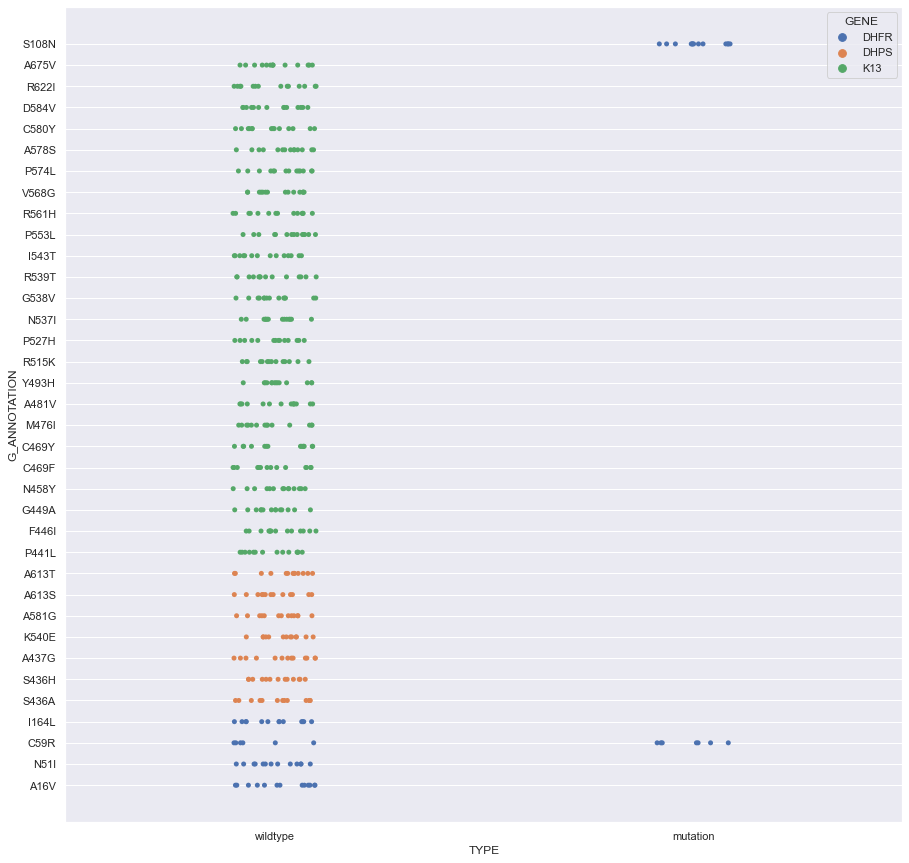

In [5]:
# Import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv("NG21_individual_EPI_VOI.csv")


# Check dataframe is correct 
df.head()

# Print number of rows and columns; confirm its longform data
print('The number of rows, columns:', df.shape) 
print('') # add space 

# Count number of unique samples in data 
uniq = df['AMD_ID_IND']
print('There are', uniq.nunique(), 'samples in this dataset.')
print('') # add space 

# Check if there are any Null or NAs 

print('The number of null or NA values in data:')
print(df.isnull().sum())
print('') # add space 

# Sort data based on CODONS to ensure shown as ascending/descending in plot 

LS = df['G_ANNOTATION']  # Copy the full annotated SNPs into a new list called LS 

codon_num = [] # create an empty list 

# Loop through G_annotation list (LS) and strip first and last character 
for x in LS: 
    codon_num.append(int(x[1:-1]))  # IMPORTANTLY change from string to integer to allow num sorting 
    ## TODO: make this more pythonic and use rstrip() and lstrip().left()

# Add the new Codon column to the current dataframe 
df['Codon'] = codon_num

# Set seaborn plot style and size (NOTE: some plots will not be affected; see seaborn docs) 

#sns.set_style("whitegrid")

# Set plot/figure size 
sns.set(rc = {'figure.figsize':(15,15)})

print('Plotting all SNPs categorized as wildtype or mutant using seaborn:')

# Plot as seaborn strippplot sorting by Codon # and then Gene in ascending order 

g= sns.stripplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
               x="TYPE", y="G_ANNOTATION",
                 hue="GENE")  



# Use catplot() to combine stripplot() and FacetGrid to further categorize data; below example is by Year 

# g= sns.catplot(data=df.sort_values(by=['GENE','Codon'], ascending=True),
#                x="TYPE", y="G_annotation", 
#                hue="GENE", col="Year")  

##TODO: 
## Adjsust size for catplot, difficult to see as is. Need to look at seaborn docs. 
## Figure out why sorting is broken (might to do something with iteration of catplot() 

#Save dataframe to csv 

# df.to_csv('organized.csv')

In [ ]:
import pandas as pd
dictcat={}
with open("NG21_individual_EPI.csv", "r") as r2: ##Open individual EPI file for QC of EPI individaul
    for lines in r2:
        if lines[0:2].isdigit(): #and "xx" not in lines.split(",")[0]: ##Check if first two letters are digit to not count the controls
            dictcat[lines[0:6]]="exist" ##Assign first 6 letters of line as one of the categories

dict_site={} ##Create dictionary for site
for items in dictcat:
    dicttestind={}  ##Create dictionary for individual samples
    with open("NG21_individual_EPI.csv", "r") as r2:
        for lines in r2:
            if items in lines:
                dicttestind[lines.split(",")[0]]="exist" ##Assign different samples to the dictionary to prevent duplicates
        countindividual=0
        for item in dicttestind:
            countindividual+=1 ##Count the number of individuals and assign total individual counted to for each site
        dict_site[items]=countindividual
    
with open ("NG21_individual_EPI.csv", "r") as t1:
    dict_Samples={} ##dictionary for all the samples
    dict_Genes={}
    count=0
    for lines in t1: ##Add number of major, minor, 
        count+=1
        if count>1:
            dict_Genes[lines.split(",")[0],lines.split(",")[2],lines.split(",")[9],lines.split(",")[11].strip("\n")]="exist"  ##Assign sample name, site, G_annotation, and type of mutation to dictionary of genes


dict_count={} ##Crate a dictionary dict_count so that we could add count of genes based on it existing in the dictionary or not. So if it doesn't exist just assisgn 1 other wise add 1 to the current numbers
for items2 in dict_Genes:
    if (items2[1],items2[2]) in dict_count:    
        dict_count[items2[1],items2[2]]=dict_count[items2[1],items2[2]]+1
    if (items2[1],items2[2]) not in dict_count:
        dict_count[items2[1],items2[2]]=1

dict_site_trans={} ##Based on dict_site created before create a translator dicttionary for different sites to different sum of items
for items in dict_site:
    if "Ab" in items:
        dict_site_trans["Abia"]=dict_site[items]
    if "Ad" in items:
        dict_site_trans["Adamawa"]=dict_site[items]
    if "Ai" in items:
        dict_site_trans["Akwa Ibom"]=dict_site[items]
    if "An" in items:
        dict_site_trans["Anambra"]=dict_site[items]
    if "Ab" in items:
        dict_site_trans["Abia"]=dict_site[items]
    if "Ba" in items:
        dict_site_trans["Bauchi"]=dict_site[items]
    if "By" in items:
        dict_site_trans["Bayelsa"]=dict_site[items]
    if "Be" in items:
        dict_site_trans["Benue"]=dict_site[items]
    if "Bo" in items:
        dict_site_trans["Borno"]=dict_site[items]
    if "Cr" in items:
        dict_site_trans["Cross River"]=dict_site[items]
    if "De" in items:
        dict_site_trans["Delta"]=dict_site[items]
    if "Eb" in items:
        dict_site_trans["Ebonyi"]=dict_site[items]
    if "Ed" in items:
        dict_site_trans["Edo"]=dict_site[items]
    if "Ek" in items:
        dict_site_trans["Ekiti"]=dict_site[items]
    if "En" in items:
        dict_site_trans["Enugu"]=dict_site[items]
    if "Fc" in items:
        dict_site_trans["Fct Abuja"]=dict_site[items]
    if "Go" in items:
        dict_site_trans["Gombe"]=dict_site[items]
    if "Im" in items:
        dict_site_trans["Imo"]=dict_site[items]
    if "Kd" in items:
        dict_site_trans["Kaduna"]=dict_site[items]
    if "Kn" in items:
        dict_site_trans["Kano"]=dict_site[items]
    if "Kt" in items:
        dict_site_trans["Katsina"]=dict_site[items]
    if "Ke" in items:
        dict_site_trans["Kebbi"]=dict_site[items]
    if "Ko" in items:
        dict_site_trans["Kogi"]=dict_site[items]
    if "Kn" in items:
        dict_site_trans["Kano"]=dict_site[items]
    if "Kw" in items:
        dict_site_trans["Kwara"]=dict_site[items]
    if "La" in items:
        dict_site_trans["Lagos"]=dict_site[items]
    if "Na" in items:
        dict_site_trans["Nasarawa"]=dict_site[items]
    if "Og" in items:
        dict_site_trans["Ogun"]=dict_site[items]
    if "On" in items:
        dict_site_trans["Ondo"]=dict_site[items]
    if "Os" in items:
        dict_site_trans["Osun"]=dict_site[items]
    if "Oy" in items:
        dict_site_trans["Oyo"]=dict_site[items]
    if "Os" in items:
        dict_site_trans["Osun"]=dict_site[items]
    if "Pl" in items:
        dict_site_trans["Plateau"]=dict_site[items]
    if "Ri" in items:
        dict_site_trans["Rivers"]=dict_site[items]
    if "So" in items:
        dict_site_trans["Sokoto"]=dict_site[items]
    if "Ta" in items:
        dict_site_trans["Taraba"]=dict_site[items]
    if "Yo" in items:
        dict_site_trans["Yobe"]=dict_site[items]
    if "Za" in items:
        dict_site_trans["Zamfara"]=dict_site[items]
        
   
count=0
for items in dict_count:
    if dict_count[items]>dict_site_trans[items[0]]: ##Check if there were samples for each site that is larger than total number of samples.
        count+=1
        
print("There were", count,"samples that are over total individauls by site")
            
df=pd.DataFrame.from_dict(dict_count, orient='index')
df.to_csv("categorical_test1.csv", sep='\t')
            
        


In [7]:
df = pd.read_csv("NG21_weighted_bysite_EPI.csv")

df['Type'] = ["Wildtype: AF=0%" if float(x.strip("%"))==0 else 'Minor: AF < 50%' if 0<float(x.strip("%"))<50 else 'Major: AF >= 50%' for x in df['VAF']]
#df['Type'] = ["Wildtype: AF=0%" if x==0 else 'Minor: AF < 50%' if 0<x<50 else 'Major: AF >= 50%' for x in df['VAF']]
df_viz = pd.DataFrame()
df_type = pd.DataFrame()

df_type["GENE"]=df.groupby(["GENE","G_ANNOTATION","Type"]).sum().reset_index()["GENE"]
df_type["G_ANNOTATION"]=df.groupby(["GENE","G_ANNOTATION","Type"]).sum().reset_index()["G_ANNOTATION"]
df_type["Type"]=df.groupby(["GENE","G_ANNOTATION","Type"]).sum().reset_index()["Type"]
df_type["Mutation"]=df.groupby(["GENE","G_ANNOTATION","Type"]).sum().reset_index()["Mutation"]
df_type["WildType"]=df.groupby(["GENE","G_ANNOTATION","Type"]).sum().reset_index()["WildType"]

#print(df_type)

df_type["Major: AF >= 50%"]=np.where(df_type["Type"]=="Major: AF >= 50%", df_type["Mutation"], 0)
df_type["Minor: AF < 50%"]=np.where(df_type["Type"]=="Minor: AF < 50%", df_type["Mutation"], 0)
df_type["Wildtype: AF=0%"]=df_type["WildType"]

df_type=df_type.drop(['Type'], axis=1)

#print(df_type)

df_final=df_type.groupby(["GENE","G_ANNOTATION"]).sum().reset_index()

df_final["GENE_G_anno"]=df_final["GENE"]+":"+df_final["G_ANNOTATION"] # Dhruvi changed df to df_final

df_final=df_final.drop(['GENE','G_ANNOTATION'], axis=1)

df_final=df_final.drop(['Mutation','WildType'], axis=1)

df_final["Total"]=df_final["Wildtype: AF=0%"]+df_final["Major: AF >= 50%"]+df_final["Minor: AF < 50%"]  # 

cols = list(df_final.columns)
a, b = cols.index('GENE_G_anno'), cols.index('Major: AF >= 50%')
cols[b], cols[a] = cols[a], cols[b]
df_final = df_final[cols]

#print(df_final)

df_final["Major: AF >= 50%"]=df_final["Major: AF >= 50%"]/df_final["Total"]
df_final["Minor: AF < 50%"]=df_final["Minor: AF < 50%"]/df_final["Total"]
df_final["Wildtype: AF=0%"]=df_final["Wildtype: AF=0%"]/df_final["Total"]

df_final.to_csv("Tab_Table_SNP_Total1_Comb.csv", index=False)

#print(df_final)

#print(df_type)



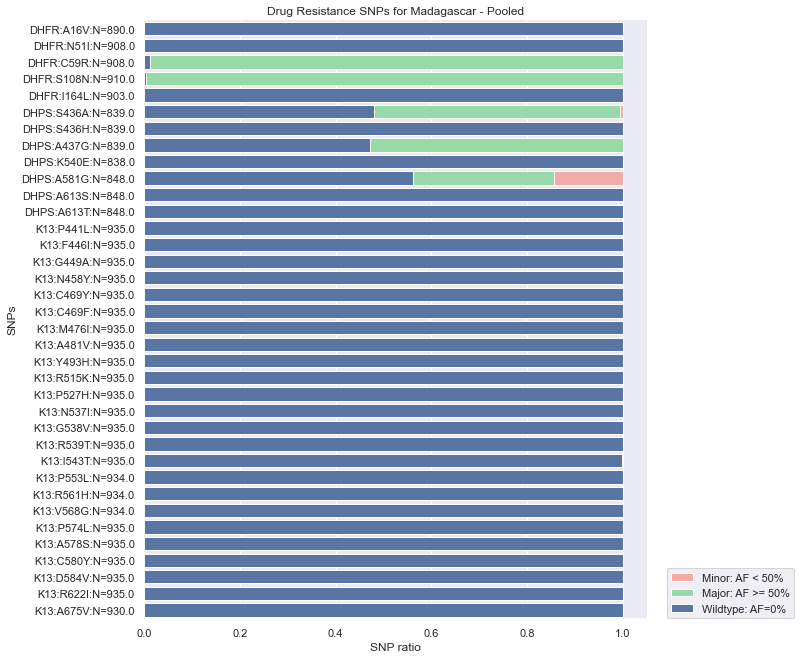

In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
##Used the previously created table
df_table_SNP=pd.read_csv("Tab_Table_SNP_Total1_Comb.csv")
#print(df_table_SNP)
##Create different dataframe by adding different columns of raios
#df_table_SNP.rename(columns={'Gene+SNP':'GeneSNP'}, inplace=True) ##Change column name from trackersnp to g_annotation
#df_table_SNP.groupby(df_table_SNP.GeneSNP.str.split(":")[0])
df_table_SNP=df_table_SNP.sort_values(by=['GENE_G_anno'])
#print(df_table_SNP.GENE_G_anno.str.split(":").str[1])
#print(df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1])
df_table_SNP["index"]=df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1]
df_table_SNP["index"]=df_table_SNP["index"].astype(int)
df_table_SNP["index2"]=df_table_SNP.GENE_G_anno.str.split(":").str[0]

df_table_SNP=df_table_SNP.sort_values(["index"])
#df.groupby('A', sort=False)
df_table_SNP=df_table_SNP.groupby(['index2'], sort=False)
df_table_SNP=pd.concat(map(lambda x: x[1], df_table_SNP))
#print(df_table_SNP)
#df_table_SNP=df_table_SNP.sort_values(["index2"])
#print(df)
#df_table_SNP=df_table_SNP.sort_values(by=["index"])
#df_table_SNP=df_table_SNP.sort_values(["index2"])
#print(df_table_SNP.sort_values(by=["index","index2"]))

#print(idx)
#df_table_SNP = df_table_SNP.reindex(idx).reset_index(drop=True)
#print(df_table_SNP)
#idx = df['email'].str.split('@', expand=True).sort_values([1,0]).index
#df_table_SNP=df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1].sort_values().index
#df_table_SNP = df_table_SNP.reindex(df_table_SNP).reset_index(drop=True)
#print(sorted(df_table_SNP, key=lambda x: df_table_SNP.GENE_G_anno.str.split(":").str[1].str[1:-1]))
df_table_SNP["Total"]=df_table_SNP["Total"].astype(str)
df_table_SNP["NewCol"]=df_table_SNP["GENE_G_anno"]+":"+"N="+df_table_SNP["Total"] ##Create the label for y-axis 
###The visualization works by adding different number of bars 
###There are three bars (total1 which has all major, minor, wildtypes, total2, just wildtype and major, and just wildtype
###The purpose is to create a stacked bar plots
df_table_SNP["total"]=df_table_SNP["Minor: AF < 50%"]+df_table_SNP["Major: AF >= 50%"]+df_table_SNP["Wildtype: AF=0%"] ##Create total for adding up all the bars by adding all the values for major minor and wildtype 
df_table_SNP["total2"]=df_table_SNP["Major: AF >= 50%"]+df_table_SNP["Wildtype: AF=0%"]
f, ax = plt.subplots(figsize = (9,11))
sns.set_color_codes('pastel')
##Once dataframes are created just plot the dataframe to the graph
ax = sns.barplot(x="total", y="NewCol", label = "Minor: AF < 50%", data=df_table_SNP, color = 'r', edgecolor = 'w')
ax = sns.barplot(x="total2", y="NewCol", label= "Major: AF >= 50%", data=df_table_SNP, color = 'g', edgecolor = 'w')
sns.set_color_codes('deep')
ax = sns.barplot(x="Wildtype: AF=0%", y="NewCol", label= "Wildtype: AF=0%", data=df_table_SNP, color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
ax.set(ylabel="Gene+SNP+#_of_Samples")
ax.set(xlabel="Types of mutations ratio")
plt.legend(loc=(1.04,0))
ax.set(title="Drug Resistance SNPs for Madagascar - Pooled", ylabel="SNPs", xlabel="SNP ratio")

plt.savefig('NG21_Bar_plot_Combined3', bbox_inches='tight')
plt.show()
